<a href="https://colab.research.google.com/github/simonmarti1992/inclibati-data/blob/master/inclibati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import pandas as pd
import os
os.chdir('/content/')
from google.colab import drive
try:
  !git clone https://github.com/simonmarti1992/inclibati-data.git
except:pass
data = pd.read_excel('./adresse-lcz.xlsx').dropna()
listeLCZ = ['Compact Midrise', 'Compact Lowrise', 'Open Midrise',
       'Open lowrise', 'Large lowrise']
data.index = data['Unnamed: 0']
os.chdir('/content/')

fatal: destination path 'inclibati-data' already exists and is not an empty directory.


In [ ]:
import sys  
sys.path.insert(0, './inclibati-data/')
import incliPlot
import epw_columns

In [188]:
# choix LCZ
LCZ = 'Large lowrise' #@param ['Compact Midrise', 'Compact Lowrise', 'Open Midrise','Open lowrise', 'Large lowrise']

In [190]:
ville = 'tours' #@param ['Paris', 'Lyon', 'Marseille', 'Lille', 'Toulouse', 'Nice', 'Bordeaux','Nantes', 'toulon', 'grenoble', 'Douai', 'Rouen', 'strasbourg','avignon', 'Montpellier', 'saint-étienne', 'béthune', 'tours','valenciennes', 'rennes', 'metz', 'nancy', 'orléans','clermont-ferrand', 'mulhouse']

In [ ]:
from incliPlot import *
import os
import sys  
os.chdir('./inclibati-data/')
map_osm, myJson, table = foliumMap(data[LCZ][ville])
map_osm

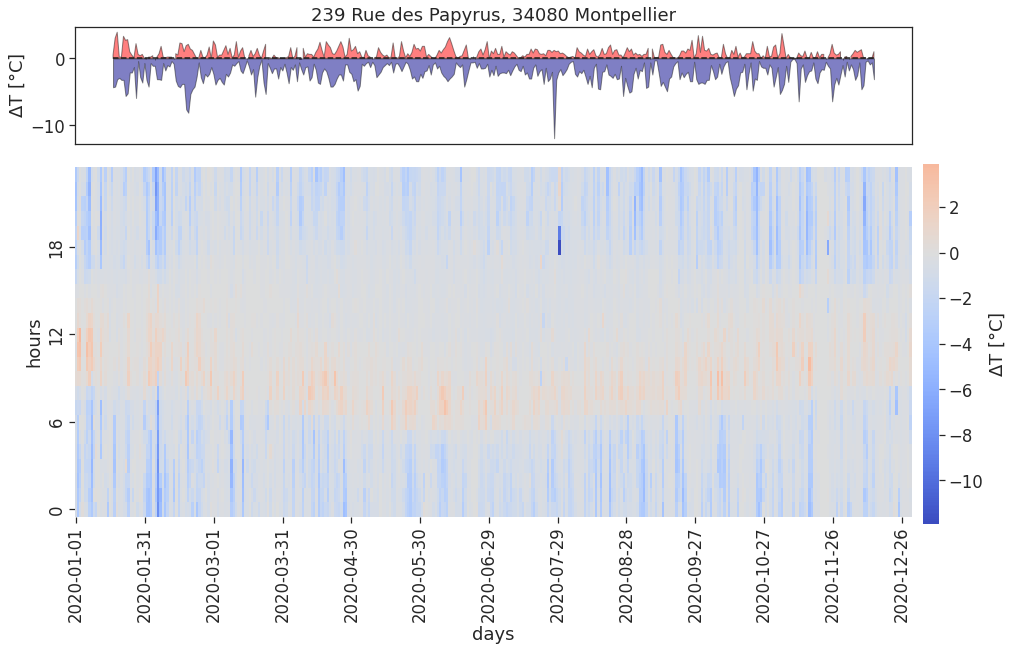

In [ ]:
initPath, uwgPath = HeatMapPlot(data[LCZ][ville])

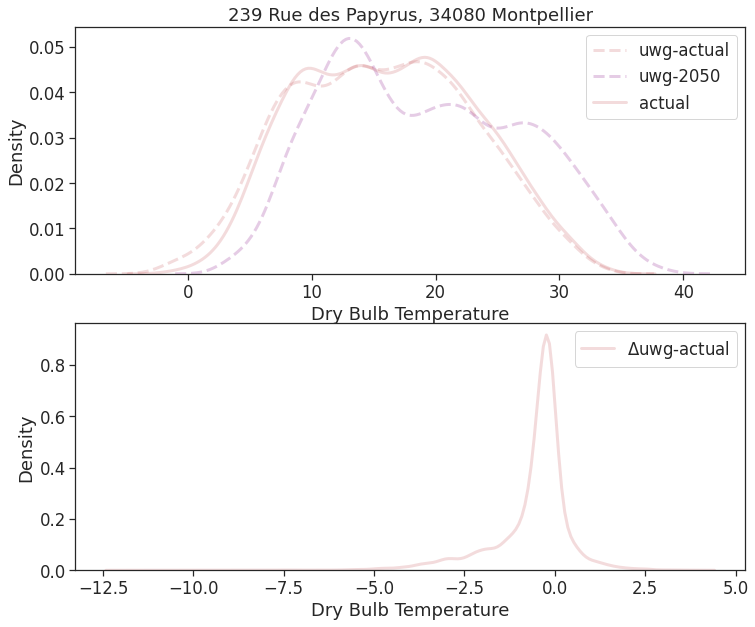

In [ ]:
import epw_columns
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(2,1, figsize = (12,10))
uwg2050 = './1-urbain-2050/{}_2050_UWG.epw'.format(data[LCZ][ville])
uwg = pd.read_csv(uwgPath, names = epw_columns.get(), skiprows = 8)
init = pd.read_csv(initPath, names = epw_columns.get(), skiprows = 8)
try:
    uwg2050 = pd.read_csv(uwg2050, names = epw_columns.get(), skiprows = 8)
    #plot
    sns.kdeplot(data = uwg, x="Dry Bulb Temperature", ax=ax0, label = 'uwg-actual', color = 'r', linestyle = '--', linewidth = 3, alpha = 0.2)
    sns.kdeplot(data = uwg2050, x="Dry Bulb Temperature", ax=ax0, label = 'uwg-2050', color = 'purple', linestyle = '--', linewidth = 3, alpha = 0.2)
    sns.kdeplot(data = init, x="Dry Bulb Temperature", ax=ax0, label = 'actual', color = 'r', linewidth = 3, alpha = 0.2)
    ax0.set_title(data[LCZ][ville])
    ax0.legend()
    
    deltaUWG = uwg[['Dry Bulb Temperature', 'Dew Point Temperature']]-init[['Dry Bulb Temperature', 'Dew Point Temperature']]
    deltaUWG2050 = uwg2050[['Dry Bulb Temperature', 'Dew Point Temperature']]-init[['Dry Bulb Temperature', 'Dew Point Temperature']]
    sns.kdeplot(data = deltaUWG, x="Dry Bulb Temperature", ax=ax1, label = '$\Delta$uwg-actual', color = 'r', linewidth = 3, alpha = 0.2)
    ax1.legend()
    
except:
    sns.kdeplot(data = uwg, x="Dry Bulb Temperature", ax=ax0, label = 'uwg-actual', color = 'r', linewidth = 3, alpha = 0.2)
    sns.kdeplot(data = init, x="Dry Bulb Temperature", ax=ax0, label = 'actual', color = 'b', linewidth = 3, alpha = 0.2)
    ax0.set_title(data[LCZ][ville])
    print('###############\nPas de données 2050\n###############')
    ax0.legend()

In [ ]:
# tout supprimer à la fin 
os.chdir('/content/')
!rm -rf inclibati-data/